In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Biblioteki załadowane pomyślnie!


## Dataset 1: KDD Cup 1999 Dataset (kddcup.data)

## Dataset 2: Network Traffic Data (train_net.csv & test_net.csv)

In [ ]:
train_net = pd.read_csv('detection-of-network-intrusions/data/dataset2/train_net.csv')
test_net = pd.read_csv('detection-of-network-intrusions/data/dataset2/test_net.csv')

print("="*80)
print("DATASET 2: Network Traffic Data")
print("="*80)
print(f"\nTrain shape: {train_net.shape}")
print(f"Test shape: {test_net.shape}")
print(f"\nTrain columns: {train_net.columns.tolist()[:10]}... ({len(train_net.columns)} total)")
print(f"\nFirst few rows:")
train_net.head()

DATASET 2: Network Traffic Data

Train shape: (4217625, 33)
Test shape: (2077339, 32)

Train columns: ['FLOW_ID', 'PROTOCOL_MAP', 'L4_SRC_PORT', 'IPV4_SRC_ADDR', 'L4_DST_PORT', 'IPV4_DST_ADDR', 'FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'LAST_SWITCHED', 'PROTOCOL']... (33 total)

First few rows:


,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,TOTAL_FLOWS_EXP,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT,ID
0,372018590,udp,53950,10.114.232.40,53,10.114.226.5,1647760833,1,1647760833,17,0,0,0,0,0,0,0,0,0,0,372018590,0,0,0,0,165,2,275,2,1647760873,0.0,NaN,0
1,368604472,tcp,37914,10.114.241.166,38303,10.114.224.218,1647686725,1,1647686725,6,22,1024,0,1024,0,1460,0,0,0,0,368604472,0,0,0,0,44,1,40,1,1647687338,0.0,Port Scanning,1
2,367513992,tcp,33216,10.114.241.166,18757,10.114.224.116,1647680044,0,1647680044,6,22,1024,0,1024,0,1460,0,0,0,0,367513992,0,0,0,0,44,1,40,1,1647680115,1.0,Port Scanning,2
3,371997670,udp,48627,10.114.225.205,53,10.114.226.5,1647760172,0,1647760172,17,0,0,0,0,0,0,0,0,0,0,371997670,0,0,0,0,128,2,160,2,1647760207,0.0,NaN,3
4,374311119,udp,35939,10.114.225.205,53,10.114.226.5,1647780916,0,1647780916,17,0,0,0,0,0,0,0,0,0,0,374311119,0,0,0,0,172,2,300,2,1647780984,0.0,NaN,4


In [ ]:
print(train_net['ANOMALY'].value_counts())

train_net.describe()


STATYSTYKI PODSTAWOWE - DATASET 2

ROZKŁAD KLAS (ANOMALY):
ANOMALY
0.0    1895705
1.0     418018
Name: count, dtype: int64

Procent anomalii w train: 18.07%
Procent anomalii w test: 18.08%


STATYSTYKI OPISOWE:


,FLOW_ID,L4_SRC_PORT,L4_DST_PORT,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,TOTAL_FLOWS_EXP,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ID
count,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4217625.0,4217625.0,4217625.0,4217625.0,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,4.217625e+06,2.313723e+06,4.217625e+06
mean,3.548546e+08,4.202829e+04,8.482456e+03,1.647568e+09,5.891606e+03,1.647568e+09,1.030320e+01,1.046772e+01,1.071608e+04,7.940944e+03,1.066126e+04,7.919090e+03,4.203106e+02,1.109923e+00,1.027895e+00,1.214000e+01,1.505174e+01,3.548546e+08,0.0,0.0,0.0,0.0,1.794091e+04,3.553015e+01,5.972693e+04,5.034809e+01,1.647569e+09,1.806690e-01,2.108812e+06
std,1.786586e+07,1.925435e+04,1.711211e+04,1.729655e+05,2.236440e+04,1.729646e+05,5.950018e+00,1.512629e+01,2.316159e+04,2.006941e+04,2.313107e+04,2.004660e+04,6.618291e+02,2.677123e+00,2.750772e+00,4.020367e+01,4.532704e+01,1.786586e+07,0.0,0.0,0.0,0.0,1.859078e+06,1.590538e+03,3.553851e+06,2.879875e+03,1.725600e+05,3.847438e-01,1.217524e+06
min,3.000000e+00,0.000000e+00,0.000000e+00,1.647330e+09,0.000000e+00,1.647330e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.0,0.0,0.0,0.0,2.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.647330e+09,0.000000e+00,0.000000e+00
25%,3.384341e+08,3.480000e+04,5.300000e+01,1.647412e+09,0.000000e+00,1.647412e+09,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.384341e+08,0.0,0.0,0.0,0.0,5.700000e+01,1.000000e+00,4.000000e+01,1.000000e+00,1.647412e+09,0.000000e+00,1.054406e+06
50%,3.674033e+08,4.921000e+04,4.430000e+02,1.647680e+09,3.000000e+00,1.647680e+09,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.674033e+08,0.0,0.0,0.0,0.0,9.800000e+01,1.000000e+00,1.290000e+02,1.000000e+00,1.647680e+09,0.000000e+00,2.108812e+06
75%,3.702917e+08,5.579100e+04,5.938000e+03,1.647709e+09,1.440000e+02,1.647709e+09,1.700000e+01,2.200000e+01,1.024000e+03,2.690000e+02,1.024000e+03,2.690000e+02,1.460000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.702917e+08,0.0,0.0,0.0,0.0,2.480000e+02,3.000000e+00,3.680000e+02,2.000000e+00,1.647709e+09,0.000000e+00,3.163218e+06
max,3.743763e+08,6.553500e+04,6.553500e+04,1.648226e+09,1.199990e+05,1.648226e+09,5.800000e+01,2.550000e+02,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,8.961000e+03,1.400000e+01,1.400000e+01,2.520000e+02,2.520000e+02,3.743763e+08,0.0,0.0,0.0,0.0,1.462178e+09,9.760230e+05,3.547208e+09,3.004436e+06,1.648226e+09,1.000000e+00,4.217624e+06


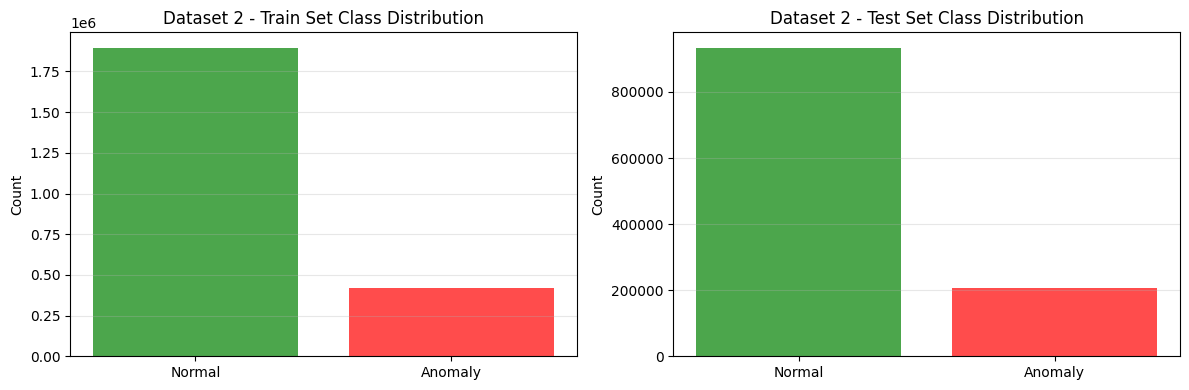

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train_counts = train_net['ANOMALY'].value_counts()
test_counts = test_net['ANOMALY'].value_counts()

axes[0].bar(['Normal', 'Anomaly'], train_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Dataset 2 - Train Set Class Distribution')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(['Normal', 'Anomaly'], test_counts.values, color=['green', 'red'], alpha=0.7)
axes[1].set_title('Dataset 2 - Test Set Class Distribution')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

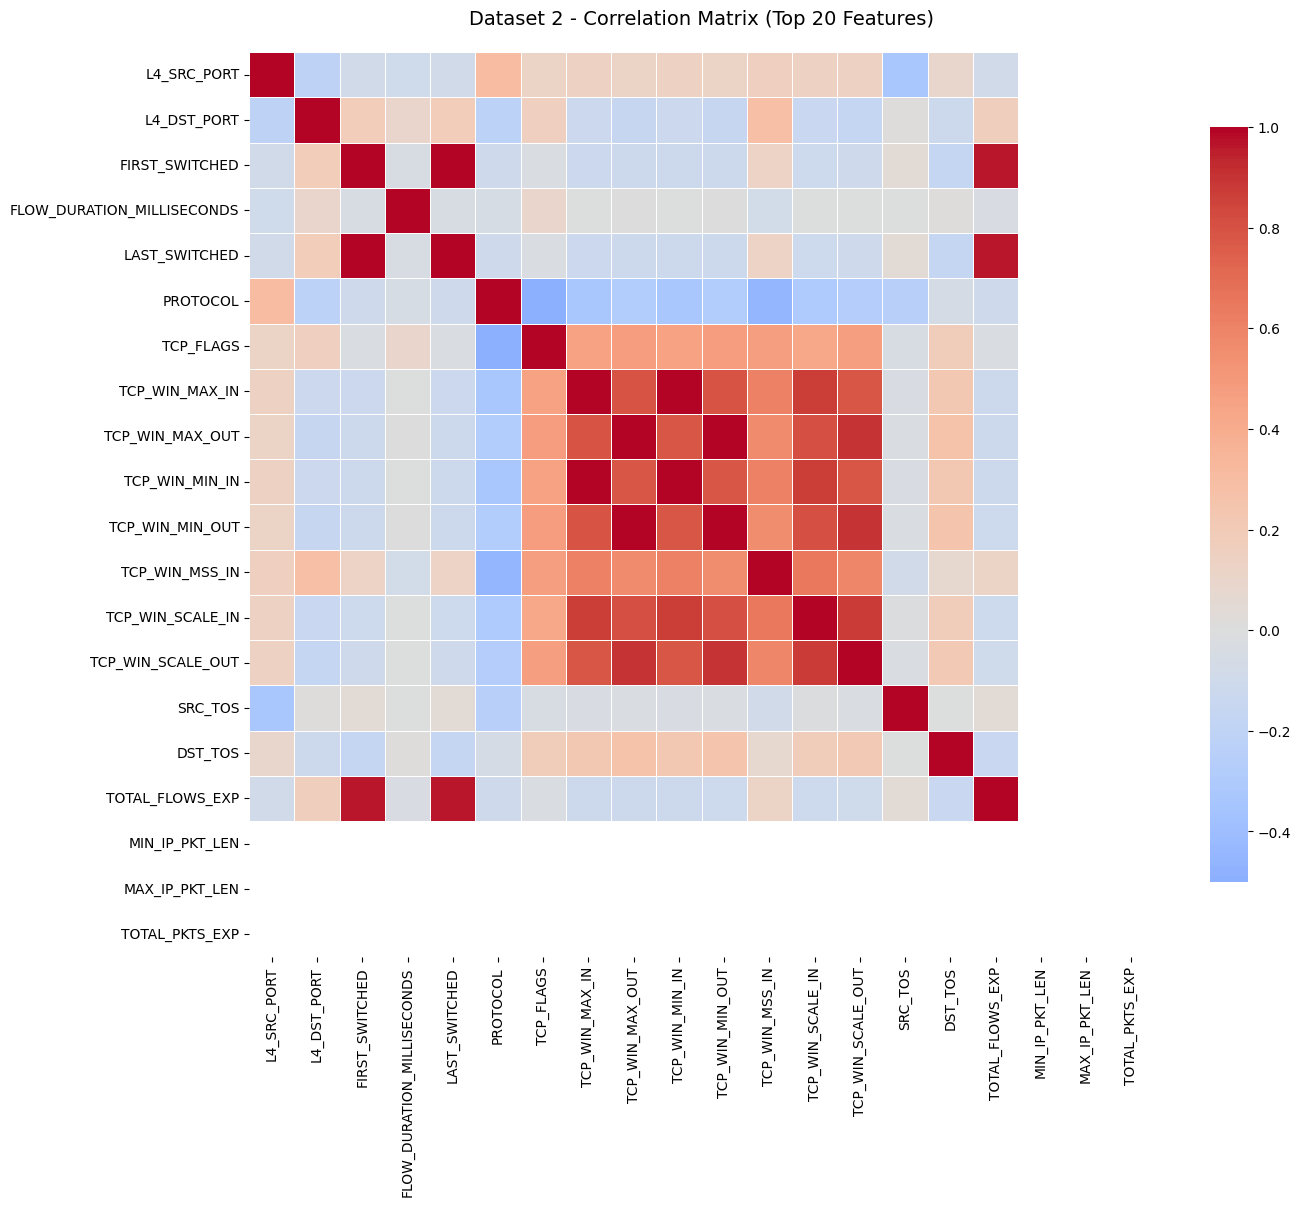

In [ ]:
numeric_cols = train_net.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'FLOW_ID']]

important_cols = numeric_cols[:20]
corr_matrix = train_net[important_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Dataset 2 - Correlation Matrix (Top 20 Features)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
cores_iot = pd.read_csv('detection-of-network-intrusions/data/dataset3/cores_iot.csv', header=None)

X = cores_iot.iloc[:, :-1]
y = cores_iot.iloc[:, -1]


print(f"\nShape: {cores_iot.shape}")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")

print(y.value_counts())

DATASET 3: CORES IoT Dataset

Shape: (1008748, 20)
Features: 19
Samples: 1008748


ROZKŁAD KLAS:
19
1    539473
0    469275
Name: count, dtype: int64

Procent anomalii: 53.48%
Procent normalnych: 46.52%


In [ ]:
X.describe()


STATYSTYKI OPISOWE - DATASET 3

Statystyki dla cech:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1008748.0,1008748.0,1008748.0,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06
mean,5.043735e+05,6.494012e+03,1.252666e+04,2.945166e+05,3.109236e+04,1.387383e+00,9.636698e-03,2.534524e+03,1.720590e+00,3.806326e+00,5.912600e+00,0.0,0.0,0.0,1.433083e+01,5.454135e+00,8.232581e+02,2.682484e-01,1.613998e+01
std,2.912006e+05,5.552642e+02,6.702989e+03,1.735689e+05,2.150950e+04,5.213996e-01,1.697565e-01,5.058344e+03,1.259145e+01,3.469489e+01,9.244759e-01,0.0,0.0,0.0,1.310810e+01,9.056104e+00,1.264514e+02,3.084885e+00,1.194758e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.521868e+05,6.478000e+03,1.096975e+04,1.446810e+05,1.442600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.0,0.0,0.0,2.000000e+00,1.000000e+00,8.070000e+02,0.000000e+00,0.000000e+00
50%,5.043735e+05,6.478000e+03,1.100100e+04,2.798115e+05,1.859800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.0,0.0,0.0,2.200000e+01,1.000000e+00,8.070000e+02,0.000000e+00,0.000000e+00
75%,7.565602e+05,6.478000e+03,1.605300e+04,4.506590e+05,5.475800e+04,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.0,0.0,0.0,2.200000e+01,1.000000e+00,9.390000e+02,0.000000e+00,0.000000e+00
max,1.008747e+06,1.500300e+04,2.824200e+04,5.971060e+05,6.542500e+04,2.000000e+00,4.000000e+00,1.664900e+04,1.700000e+02,4.780000e+02,1.000000e+01,0.0,0.0,0.0,1.250000e+02,5.300000e+01,1.248000e+03,6.800000e+01,1.140000e+03


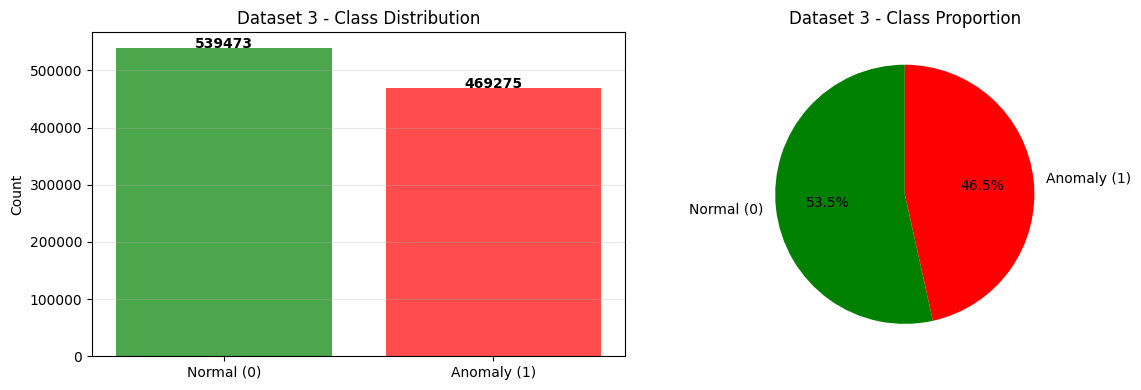

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

class_counts = y.value_counts()
colors = ['green', 'red']

axes[0].bar(['Normal (0)', 'Anomaly (1)'], class_counts.values, color=colors, alpha=0.7)
axes[0].set_title('Dataset 3 - Class Distribution')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

axes[1].pie(class_counts.values, labels=['Normal (0)', 'Anomaly (1)'], 
            colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Dataset 3 - Class Proportion')

plt.tight_layout()
plt.show()

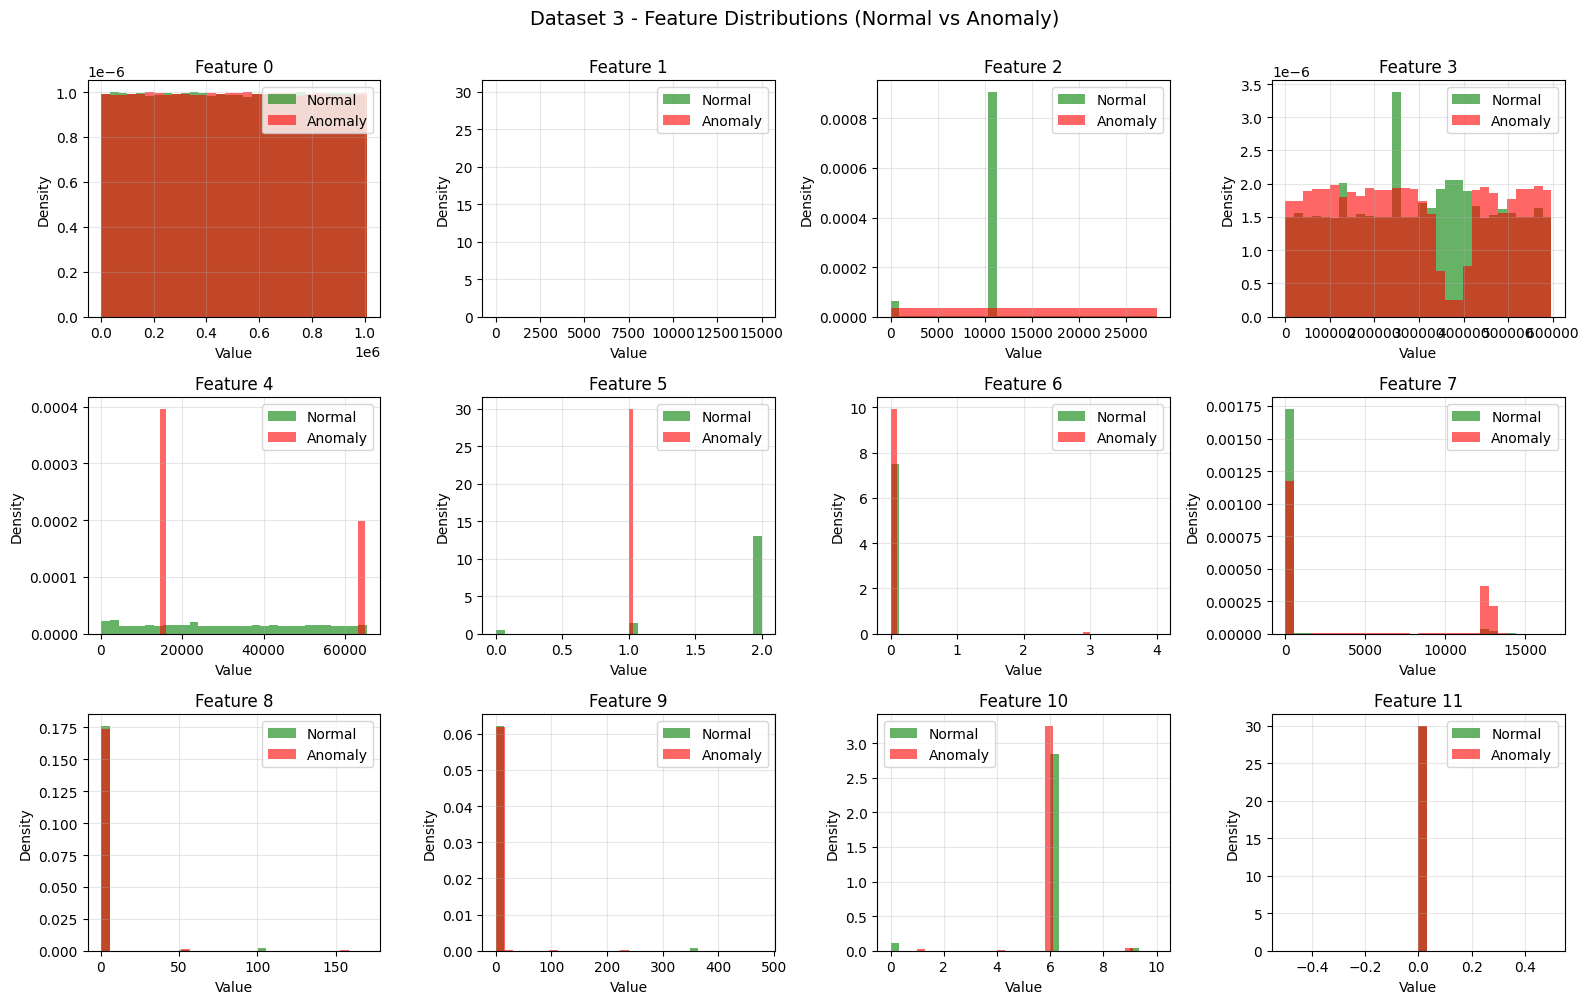

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

features_to_plot = range(min(12, X.shape[1]))

for idx, feat in enumerate(features_to_plot):
    ax = axes[idx]
    
    normal_data = X[y == 0].iloc[:, feat]
    anomaly_data = X[y == 1].iloc[:, feat]
    
    ax.hist(normal_data, bins=30, alpha=0.6, label='Normal', color='green', density=True)
    ax.hist(anomaly_data, bins=30, alpha=0.6, label='Anomaly', color='red', density=True)
    ax.set_title(f'Feature {feat}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Dataset 3 - Feature Distributions (Normal vs Anomaly)', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

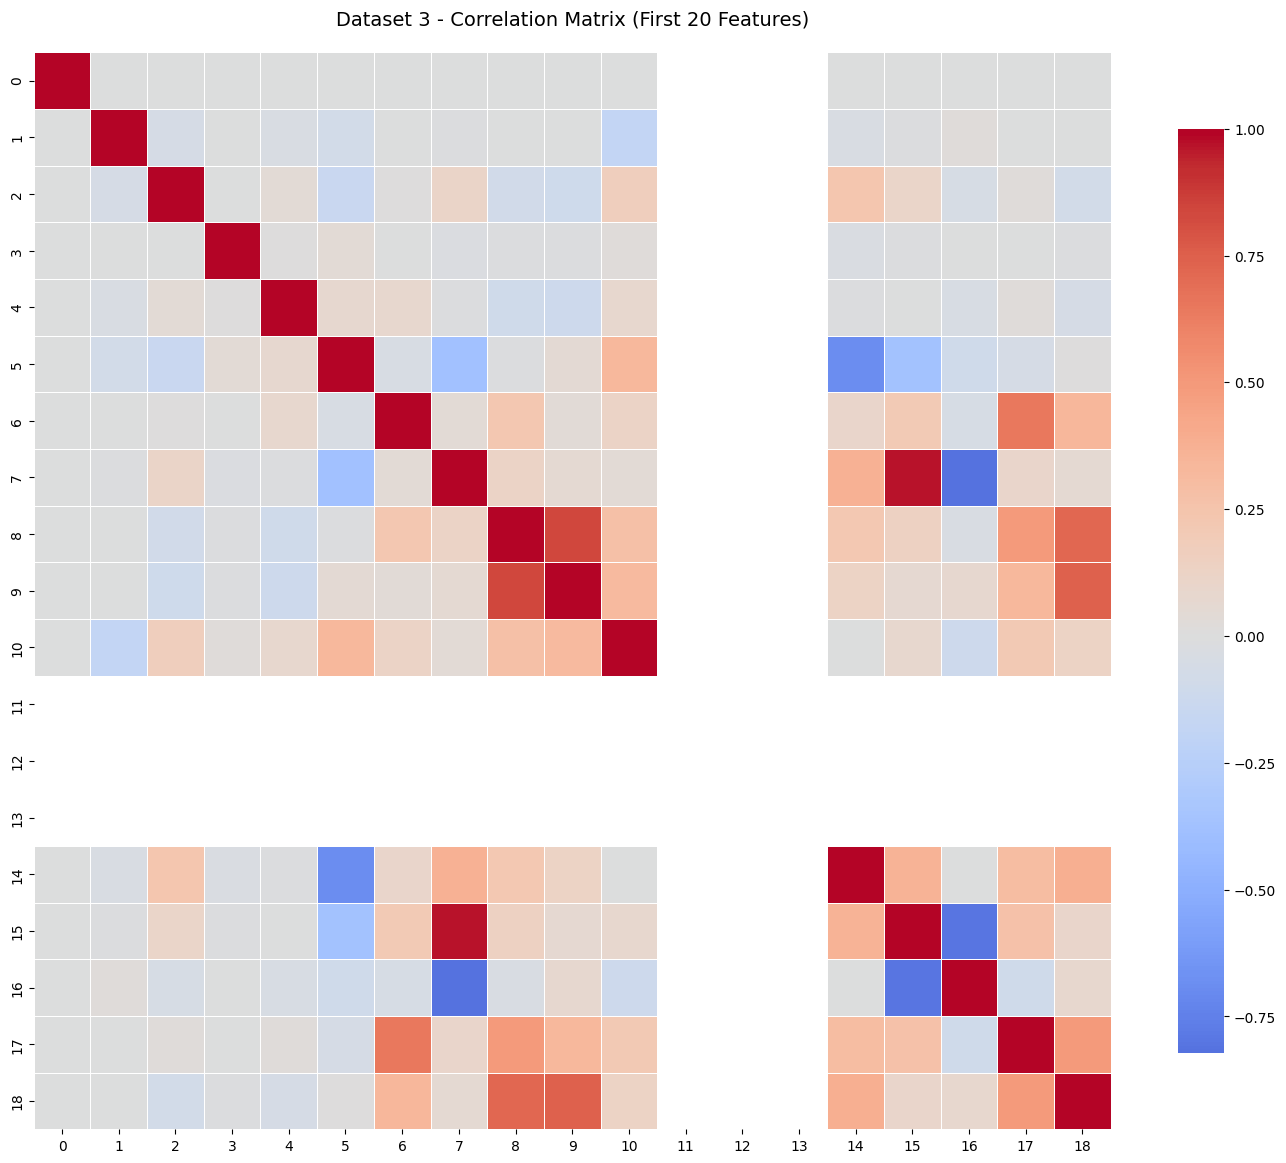

In [ ]:
selected_features = range(min(20, X.shape[1]))
X_subset = X.iloc[:, selected_features]

corr_matrix = X_subset.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Dataset 3 - Correlation Matrix (First 20 Features)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Porównanie Datasetów

Podsumowanie kluczowych statystyk wszystkich trzech datasetów.

PODSUMOWANIE DATASETÓW
              Dataset  Samples  Features  Normal (%)  Anomaly (%)
    Dataset 2 (Train)  4217625        32       81.93        18.07
     Dataset 2 (Test)  2077339        31       81.92        18.08
Dataset 3 (CORES IoT)  1008748        19       46.52        53.48


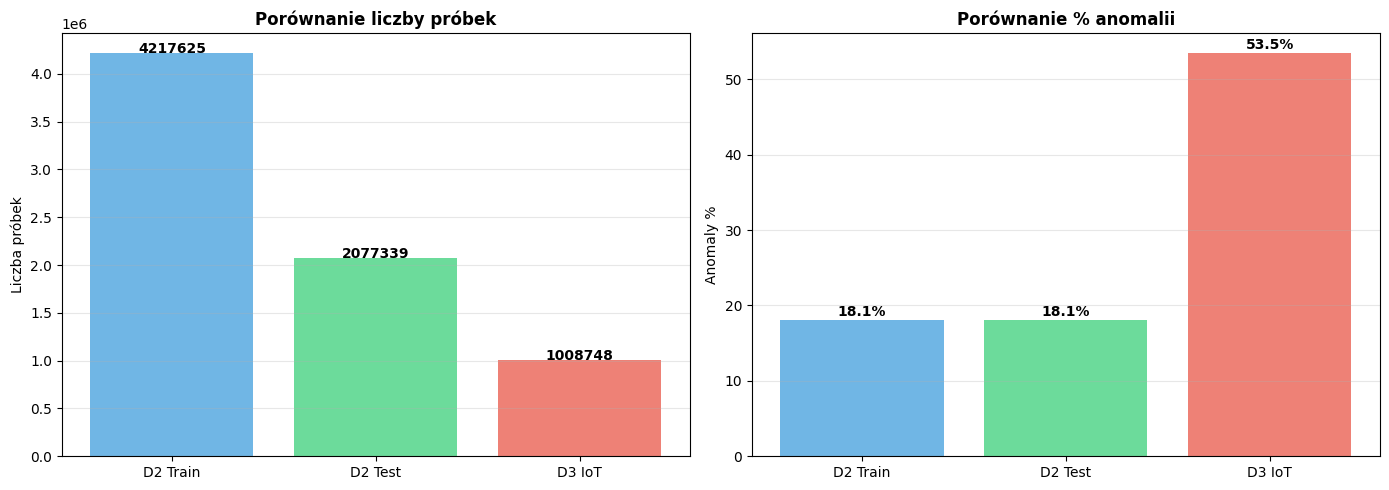

In [ ]:
comparison_data = {
    'Dataset': ['Dataset 1 (KDD Cup)', 'Dataset 2 (Train)', 'Dataset 2 (Test)', 'Dataset 3 (CORES IoT)'],
    'Samples': [len(kdd_data), len(train_net), len(test_net), len(cores_iot)],
    'Features': [len(kdd_data.columns)-2, len(train_net.columns)-1, len(test_net.columns)-1, X.shape[1]],
    'Normal (%)': [
        (1-kdd_data['is_attack'].mean())*100,
        (1-train_net['ANOMALY'].mean())*100,
        (1-test_net['ANOMALY'].mean())*100,
        (1-y.mean())*100
    ],
    'Anomaly (%)': [
        kdd_data['is_attack'].mean()*100,
        train_net['ANOMALY'].mean()*100,
        test_net['ANOMALY'].mean()*100,
        y.mean()*100
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(2)

print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

datasets = ['D1 KDD', 'D2 Train', 'D2 Test', 'D3 IoT']
samples = comparison_df['Samples'].values
colors = ['#9b59b6', '#3498db', '#2ecc71', '#e74c3c']
axes[0].bar(datasets, samples, color=colors, alpha=0.7)
axes[0].set_title('Porównanie liczby próbek', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Liczba próbek')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_yscale('log')
for i, v in enumerate(samples):
    axes[0].text(i, v * 1.1, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

anomaly_pct = comparison_df['Anomaly (%)'].values
axes[1].bar(datasets, anomaly_pct, color=colors, alpha=0.7)
axes[1].set_title('Porównanie % anomalii', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Anomaly %')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(anomaly_pct):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:

kdd_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

kdd_data = pd.read_csv('detection-of-network-intrusions/data/dataset1/kddcup.data', 
                       names=kdd_columns, header=None)

print("="*80)
print("DATASET 1: KDD Cup 1999")
print("="*80)
print(f"\nShape: {kdd_data.shape}")
print(f"Features: {len(kdd_data.columns)-1}")
print(f"Samples: {len(kdd_data)}")
print(f"\nFirst few rows:")
kdd_data.head()

DATASET 1: KDD Cup 1999

Shape: (4898431, 42)
Features: 41
Samples: 4898431

First few rows:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print("\n" + "="*80)
print("="*80)

kdd_data['is_attack'] = kdd_data['label'].apply(lambda x: 0 if 'normal' in x else 1)

print(kdd_data['is_attack'].value_counts())


attack_types = kdd_data['label'].value_counts().head(10)
print(attack_types)

print(kdd_data['protocol_type'].value_counts())

print(kdd_data['service'].value_counts().head(10))


STATYSTYKI PODSTAWOWE - DATASET 1

ROZKŁAD KLAS (Binary):
is_attack
1    3925650
0     972781
Name: count, dtype: int64

Procent ataków: 80.14%
Procent normalnych: 19.86%


TOP 10 TYPÓW ATAKÓW:
label
smurf.          2807886
neptune.        1072017
normal.          972781
satan.            15892
ipsweep.          12481
portsweep.        10413
nmap.              2316
back.              2203
warezclient.       1020
teardrop.           979
Name: count, dtype: int64


TOP 10 PROTOKOŁÓW:
protocol_type
icmp    2833545
tcp     1870598
udp      194288
Name: count, dtype: int64


TOP 10 SERWISÓW:
service
ecr_i       2811660
private     1100831
http         623091
smtp          96554
other         72653
domain_u      57782
ftp_data      40697
eco_i         16338
finger         6891
urp_i          5378
Name: count, dtype: int64

ROZKŁAD KLAS (Binary):
is_attack
1    3925650
0     972781
Name: count, dtype: int64

Procent ataków: 80.14%
Procent normalnych: 19.86%


TOP 10 TYPÓW ATAKÓW:
label
smurf

In [ ]:
numeric_features = kdd_data.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features if col != 'is_attack']

kdd_data[numeric_features[:10]].describe()



STATYSTYKI OPISOWE (wybrane cechy):


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03


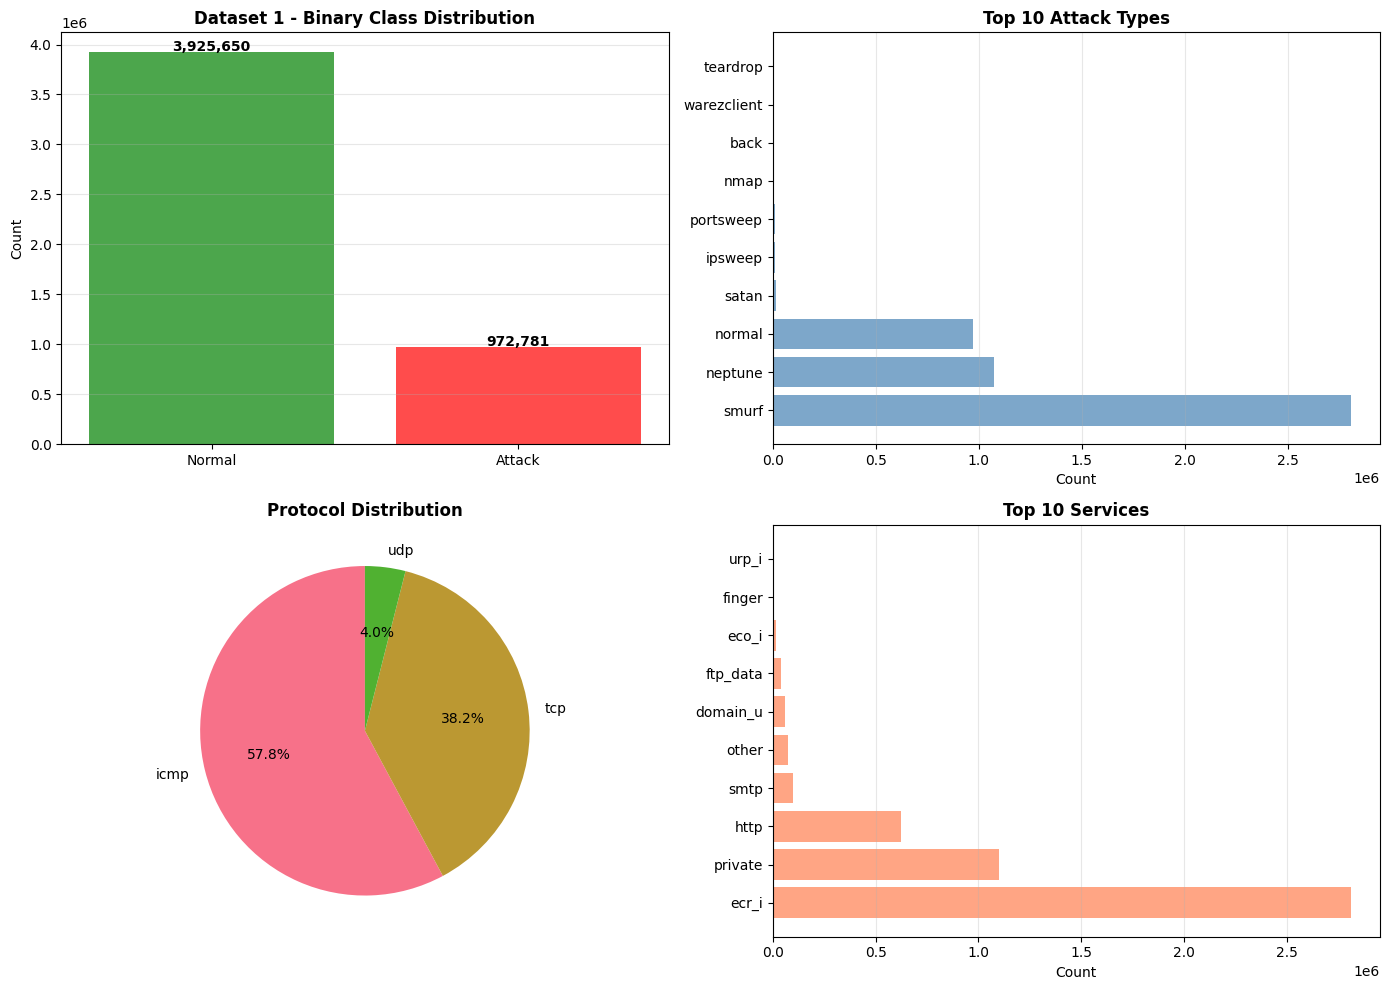

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes[0, 0]
attack_counts = kdd_data['is_attack'].value_counts()
ax.bar(['Normal', 'Attack'], attack_counts.values, color=['green', 'red'], alpha=0.7)
ax.set_title('Dataset 1 - Binary Class Distribution', fontweight='bold')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(attack_counts.values):
    ax.text(i, v + 10000, f'{v:,}', ha='center', fontweight='bold')

ax = axes[0, 1]
top_attacks = kdd_data['label'].value_counts().head(10)
ax.barh(range(len(top_attacks)), top_attacks.values, color='steelblue', alpha=0.7)
ax.set_yticks(range(len(top_attacks)))
ax.set_yticklabels([label.replace('.', '') for label in top_attacks.index])
ax.set_xlabel('Count')
ax.set_title('Top 10 Attack Types', fontweight='bold')
ax.grid(axis='x', alpha=0.3)

ax = axes[1, 0]
protocol_counts = kdd_data['protocol_type'].value_counts()
ax.pie(protocol_counts.values, labels=protocol_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Protocol Distribution', fontweight='bold')

ax = axes[1, 1]
top_services = kdd_data['service'].value_counts().head(10)
ax.barh(range(len(top_services)), top_services.values, color='coral', alpha=0.7)
ax.set_yticks(range(len(top_services)))
ax.set_yticklabels(top_services.index)
ax.set_xlabel('Count')
ax.set_title('Top 10 Services', fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

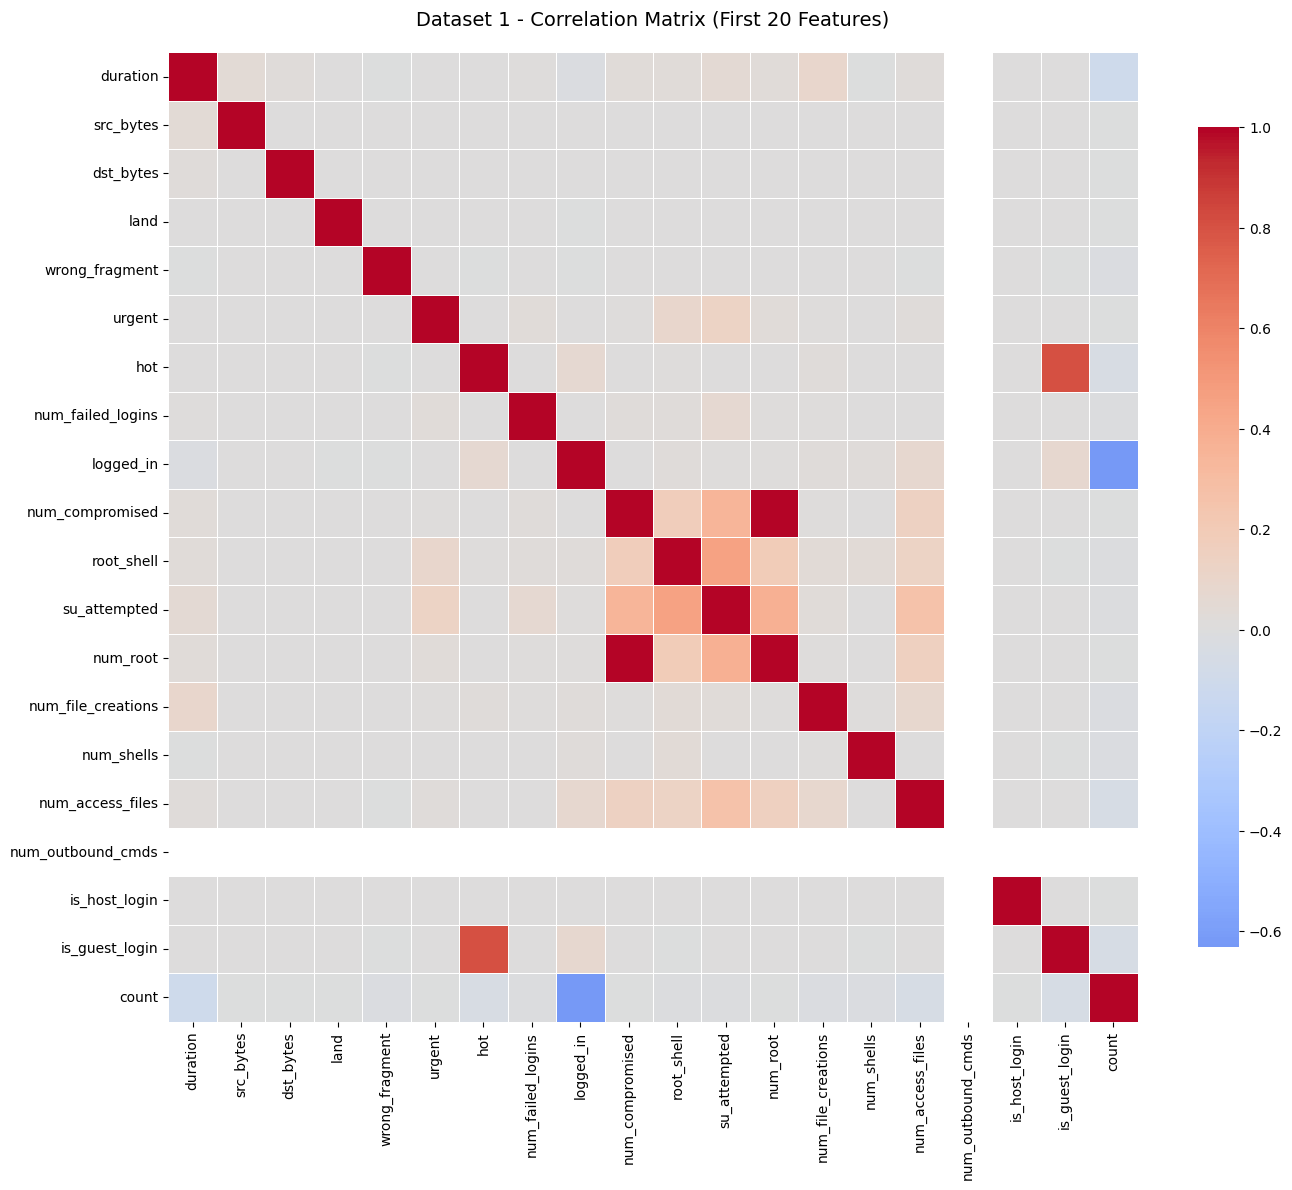

In [ ]:
selected_numeric = numeric_features[:20]
corr_matrix_kdd = kdd_data[selected_numeric].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_kdd, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Dataset 1 - Correlation Matrix (First 20 Features)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()